## More One Qubit Gates


### Z gate

Z-gate flips the sign of $\ket{1}$ and does not do anything on $\ket{0}$. Given this information can you construct the $2$ x $2$ matrix representation for the Z-gate?

In qiskit, 'z' is used for a zgate

#### <font color= 'red'>**Lab Exercise:** Using qiskit, starting from the qubit state 1, use all of Hadamard, Not and Z gate atleast once to obtain measurement outcome of state 1 with probability nearly 1 </font>
Look at how destructive interferences play out in this example


#### <font color='green'> *It is possible to condtionally apply operators based on measurement outomes of an intermediate state of a Quantum Circuit* </font>

##### **Example:** Start with a $0$ qubit state, apply hadamard to create a linear superposition and perform a measurement. If measurement outcome is $0$, apply hadamard and then do another measurement on the register and observe the results. First try to do this mentally (or use a pen and paper) then use qiskit and check. 

c:\Users\viraj.dsouza\OneDrive - Plaksha University\Main\PlakshaQC\qcvenv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


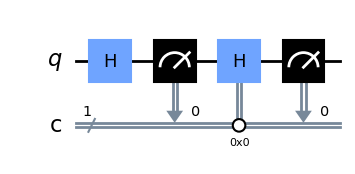

In [25]:

# import all necessary objects and methods for quantum circuits
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with a single qubit
q = QuantumRegister(1,"q")
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

# apply the first Hadamard
qc.h(q[0])

# the first measurement
qc.measure(q,c)

# apply the second Hadamard if the measurement outcome is 0
qc.h(q[0]).c_if(c,0)

# the second measurement
qc.measure(q[0],c)

# draw the circuit
qc.draw(output="mpl")

In [26]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

{'1': 7528, '0': 2472}


As expected we get state $0$ with $25%$ probability and $1$ with 75% probability.

### T gate

It induces a $\frac{\pi}{4}$ phase in the qubit state $1$ and does not have any effect on state $0$.  The matrix representation of the gate is $$T = \begin{pmatrix}
                1 & 0 \\
                0 & e^{i\pi/4}
            \end{pmatrix}$$

#### <font color= 'red'>**Lab Exercise:** How does T gate relate to the Z gate?</font>

##### <font color= 'red'>**Homework:** Similar to T gate, costruct S gate which induces a $\frac{\pi}{4}$ phase in the qubit state $1$ and does not have any effect on state $0$?</font>







### Y gate

  The action of Y gate is as follows:  $$|0\rangle \rightarrow i|1\rangle$$
        $$|1\rangle \rightarrow -i|0\rangle$$ 
        The matrix representation: 
        $$ Y = \begin{pmatrix}
                0 & -i \\
                i & 0
            \end{pmatrix} $$

# Two Qubit States

##### Remember that when we have a quantum system with two qubits ($\ket{ab}$), we can represent it using the basis states: $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $.

The state $ \ket{ab} $ means that 

- the first qubit is in state $ \ket{a} $ and
- the second qubit is in state $ \ket{b} $,

where $ a,b \in \{0,1\} $.

$ \ket{ab} = \ket{a} \otimes \ket{b} $ (or shortly $\ket{a}\ket{b}$.

<h3> Generalization </h3>

Suppose that we have $ k>1 $ qubits (or bits). Then, any deterministic (basis) state can be represented by $ k $ bits:  $ \ket{b_1b_2\cdots b_k} $, where any $ b_j \in \{0,1\} $ for $ 1 \leq j \leq k $.

- What is the size of the vector representing the states of $k$ qubits?
- If the decimal value of $ \ket{b_1 b_2 \cdots b_k} $ is $ 42 $, then which entry has the value of 1?

# Two Qubit Gates

We define a quantum circuit with two qubits and apply the Hadamard operator to each of them.


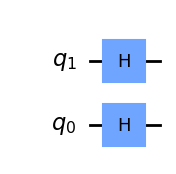

In [29]:
from qiskit import QuantumCircuit

# remark the concise representation of a quantum circuit
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

qc.draw(output='mpl', reverse_bits=True) # why did I use reverse_bits=True ?


These two Hadamards can also be represented as a single quantum operator on two qubits: $ H \otimes H $. 

<font color='red'> Can you do this calculation and check manually whether the circuit results after measurement matches your theoretical calculation? </font>

<h4> Unitary backend</h4>

Unitary_simulator of qiskit gives a single matrix representation of all gates in the circuit until that point.


In [30]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3).data
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)

0.5 0.5 0.5 0.5 
0.5 -0.5 0.5 -0.5 
0.5 0.5 -0.5 -0.5 
0.5 -0.5 -0.5 0.5 


##### <font color='red'>Perform a measurement on both the registers and observe the results. Does it match with your theoretical expectation? </font>

#### SWAP Gate:

The gate is equivalent to a state swap and is a **classical logic gate.**
$$
        |a, b\rangle \rightarrow |b, a\rangle $$

The matrix representation is: 
$$ 
SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}
$$


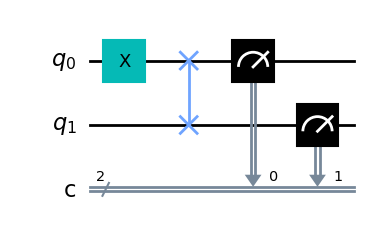

In [16]:
# Swapping two qubit states

q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.swap(q[0], q[1])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

# draw the circuit
qc.draw(output="mpl")

In [17]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
# print(job.result)
counts = job.result().get_counts(qc)
print(counts)

{'10': 10000}


#### CNOT gate: (CX gate)

Controlled- X gate is a two qubit gate, taking 2 qubit inputs namely (control,target). A NOT gate operates on the target if the control is in state $\ket{1}$

To summarize:
- $ CNOT \ket{00} = \ket{00} $,
- $ CNOT \ket{01} = \ket{01} $,
- $ CNOT \ket{10} = \ket{11} $,
- $ CNOT \ket{11} = \ket{10} $.
      
Thus the matrix representation is:

$$ CX =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}$$

*Important note:*
<font color= 'green'> 
In Qiskit's convention, higher qubit indices are more significant (little endian convention). For the state $\ket{q_1q_0}$, $q_1$ is the higher qubit index (most significant).  Controlled gates here are presented with the assumption of more significant qubit as target, which in our case would be $q_1$. Some textbook use a reverse convention, but that's fine until we know the definitions we start with.</font>


{'11': 5000, '00': 5000}
State 00 is observed with frequency % 50.0
State 11 is observed with frequency % 50.0


c:\Users\viraj.dsouza\OneDrive - Plaksha University\Main\PlakshaQC\qcvenv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


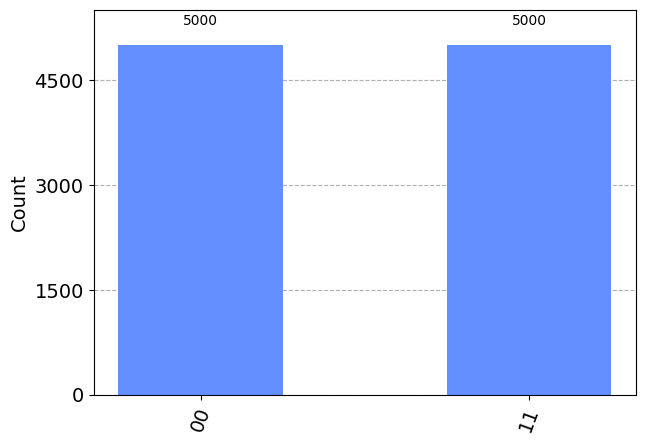

In [23]:
q = QuantumRegister(2,"q")  #note that q[1] is most significant as per qiskit convention, so that state created here is |q_1q_0> and not |q_0q_1>
c = ClassicalRegister(2,"c")
qc = QuantumCircuit(q,c)
qc.h(q[[0]])
qc.cx(q[0],q[1])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

# draw the circuit
qc.draw(output="mpl")

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
# print(job.result)
counts = job.result().get_counts(qc)
print(counts) 

n_z = counts['00']
# n_zo = counts['01'] #note counts dictionary won't have the key (state) which can't be a result of a measurement. For example 01 cannot be a measurement outcome here, hence this line would give an error
# n_oz = counts['10']
n_oo = counts['11']
total= n_z+n_oo

print("State 00 is observed with frequency %",100*n_z/(total))
# print("State 01 is observed with frequency %",100*n_zo/(total)) 
# print("State 10 is observed with frequency %",100*n_oz/(total))
print("State 11 is observed with frequency %",100*n_oo/(total))


# we can show the result by using histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)


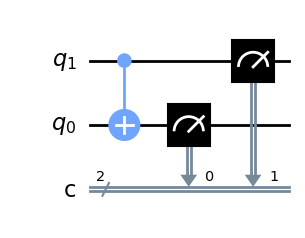

00 --CNOT-> {'00': 1024}


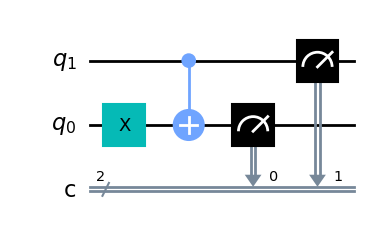

01 --CNOT-> {'01': 1024}


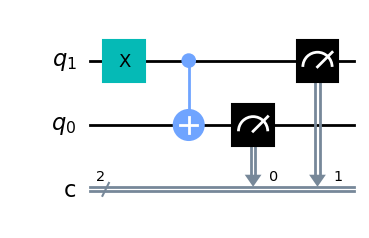

10 --CNOT-> {'11': 1024}


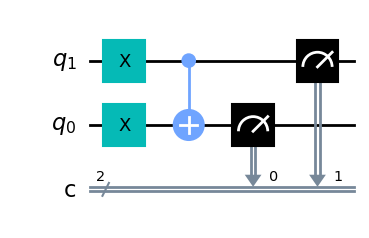

11 --CNOT-> {'10': 1024}


In [31]:
# Control gate on all two qubit basis states

pairs = ['00','01','10','11']

for pair in pairs:
    from qiskit import QuantumCircuit, execute, Aer
    qc = QuantumCircuit(2,2)  #note how circuit can be directly made without explicitly defining registers first (not advisable though)
    # initialize the pair
    # we follow the reading order in Qiskit
    # q1-tensor-q0
    if pair[1] == '1':
        qc.x(0)
    if pair[0] =='1':
        qc.x(1)
    qc.cx(1,0)
    qc.measure(0,0)
    qc.measure(1,1)
    display(qc.draw(output='mpl',reverse_bits=True))
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
    counts = job.result().get_counts(qc)
    print(pair,"--CNOT->",counts)

##### <font color= 'red'> **Homework:** Like $CX$, many other control gates can be constructed. Can you construct a $CZ$, $CY$ and a controlled Hadamard gate ? </font>